# Rabi Oscillations

We study Rabi oscillations as in the paper [Revising quantum optical phenomena in adatoms coupled to graphene nanoantennas](https://www.degruyter.com/document/doi/10.1515/nanoph-2022-0154/html).

NOTE: It is a good idea to get familiar with orbital lists by consulting the tutorial first.

## Building a two-level system

We set up an isolated adatom.

In [1]:
import jax.numpy as jnp
import matplotlib
from granad import Wave, Orbital, OrbitalList, MaterialCatalog, Triangle

lower_level = Orbital(tag="atom")
upper_level = Orbital(tag="atom")
atom = OrbitalList([lower_level, upper_level])

atom.set_electrons( 1 )
atom.set_hamiltonian_element(upper_level, upper_level, 0.5)
atom.set_hamiltonian_element(lower_level, lower_level, -0.5)

atom.set_dipole_transition(upper_level, lower_level, [0, 7.5, 0])

We study undamped time evolution under harmonic illumination

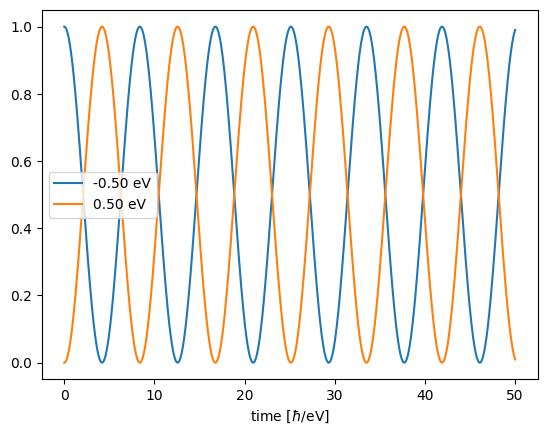

In [2]:
wave = Wave(amplitudes=[0, 0.05, 0], frequency=1)
time, density_matrices = atom.get_density_matrix_time_domain(
    end_time=50,
    illumination=wave,
    use_rwa=True,
    coulomb_strength = 0.0,
    steps_time = 1e5,
)
atom.show_time_dependence(density_matrices, time=time)

## Coupling to a Flake

We combine the TLS with a graphene flake in the top position above an atom.

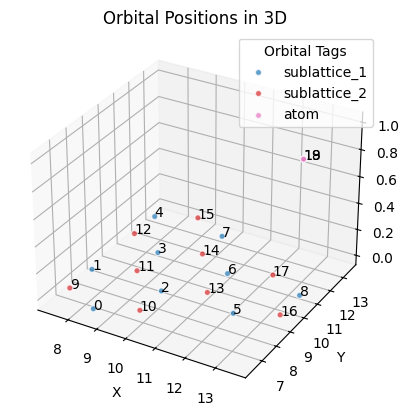

In [3]:
graphene = MaterialCatalog.get("graphene")
flake = graphene.cut_flake(Triangle(10, armchair = True, shift = [10,10]), plot=False)
flake_with_atom = flake + atom
flake_with_atom.set_electrons( flake_with_atom.electrons - 1 )
pz_orbital = flake_with_atom[8]
top = pz_orbital.position + jnp.array([0, 0, 1])
flake_with_atom.set_position(tag="atom", position=top)
flake_with_atom.show_3d(show_index=True)

We set the couplings

In [4]:
flake_with_atom.set_hamiltonian_element(pz_orbital, lower_level, 0.5)
flake_with_atom.set_hamiltonian_element(pz_orbital, upper_level, 0.5)

Now, the time evolution of the composite system

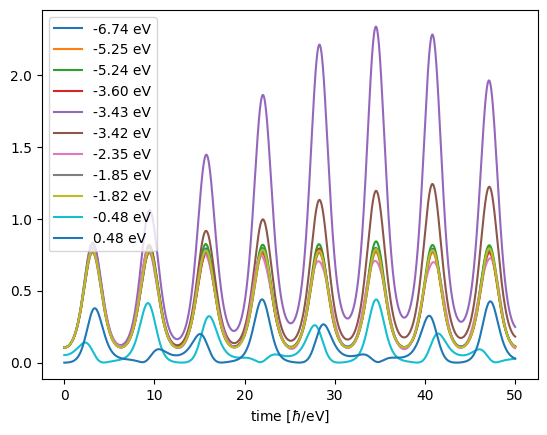

In [5]:
time, density_matrices = flake_with_atom.get_density_matrix_time_domain(
    end_time=50,
    illumination=wave,
    use_rwa=True,
    coulomb_strength = 0.0,
    steps_time = 1e5,
)
density_matrices_e = flake_with_atom.transform_to_energy_basis(density_matrices)
flake_with_atom.show_time_dependence( density_matrices_e, time=time)